# Aula 4: Data Wrangling

Com os conceitos aprendidos até o momento já é possível fazer uma analise simples em um conjunto de dados, a partir de informações que estão representadas diretamente por eles.

Porém normalmente os dados que vamos trabalhar não são consistentes, seja por estarem faltando informações em algumas linhas, seja por ter informações guardadas de maneiras que não permitem a analise adequada, como por exemplo valores de preços representados como string.

Além disto muitas vezes queremos fazer analises de informações que estão representadas diretamente pelos dados, sendo necessário manipula-los de modo a extrair estas informações "escondidas".

Para e retirada de sua inconsistência dos dados e chamada de limpeza (data clean) e quando juntamos com sua manipulação para a fim de encontrar informações novas também pode ser chamada de data wranling.

Nesta aula vamos focar em algumas funções mais avançadas do pandas, que permite esse processo. Para isto vamos utilizar um conjunto de dados muito famoso, o Titanic, que contem dados sobre os passageiros do Titanic incluindo as pessoas que sobreviveram ou não.

A ideia é passar a aula de maneira a instigar os alunos a encontrarem quais variáveis tem influencia para que a pessoa sobreviva ou não, permitindo criar um modelo básico para prever a sobrevivência de um passageiro.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Pegando dado do Titanic
Titanic é um dos conjunto de dados muito famoso do meio de ciências de dados e também o exercício introdutório do Kaggle, la você pode encontrar os dados e sua historia pode ser acessa pela plataforma através deste [link](https://www.kaggle.com/c/titanic).

Incentive os alunos a fazer a conta no Kaggle e baixar os dados separados para treino, assim eles ja se ambientam com o site e com o processo de um desafio de machine learning. 

Após baixado podemos ler os dados, segue o codigo abaixo:

In [2]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Lendo os dados
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Verificando como as informações estão distribuidas
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Limpeza de dados
Primeiro passo necessário a ser observado nesse dado e sua inconsistência, sendo necessário uma limpeza nestes dados, retirando dados inválidos ou ate acrescentando dados faltantes. Com o codigo acima podemos perceber, pro exemplo, que nos dados de Cabin temos apenas 204 valores, enquanto a tabela tem 204. Outras colunas também estão incosistente como Embarked e Age.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Analise previa

porém antes da limpeza dos dados tente pedir para que os alunos consigam encontrar padrões de sobreviventes nos dados brutos, segue alguns exemplos de analises que podem ser feitas

**Sobreviventes por sexo**

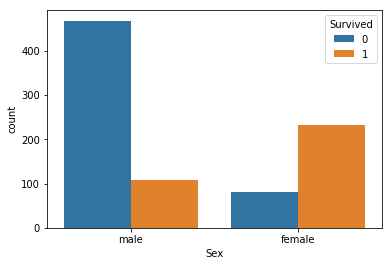

In [5]:
sns.countplot(data=titanic,x='Sex',hue='Survived');

**Sobrevivente por class**

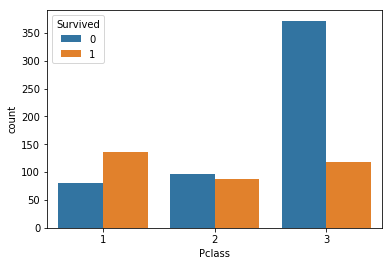

In [6]:
sns.countplot(data=titanic,x='Pclass',hue='Survived');

**valor da passagem por sobrevivente**

Neste caso precisamos separa os sobreviventes do não sobreviventes

In [7]:
sobreviventesMascara = titanic['Survived'] == 1
sobreviventes = titanic[sobreviventesMascara]
mortoMascara = titanic['Survived'] == 0
mortos = titanic[mortoMascara]

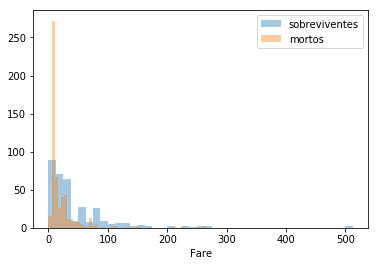

In [8]:
sns.distplot(sobreviventes['Fare'],label='sobreviventes',kde=False);
sns.distplot(mortos['Fare'],label='mortos',kde=False);
plt.legend();

## Limpeza de dados

#### Apagando dados pouco informativos

Vamos apagar o id, pois como cada passageiro tem seu id ele não tras informações sobre a sobrevivencia do passageiro.

Tambem vamos apagar ticket, pois não trazem muita informações uteis.

In [9]:
#Apagando com dropna
titanic2 = titanic.drop(['PassengerId','Ticket'],axis=1)

In [10]:
#Apagando com pop
# titanic.pop('PassengerId')
# titanic.pop('Ticket')

#### Tratando dados nulos
O pandas fornece duas funções para tratar dados nulos, a dropna e fillnan.

**Dropnan**: A função dropnan apaga todo uma linha, caso ela contenha dados nulos, assim correr o risco de perder muitos dados, o que não é indicado na maioria dos casos.

**Fillna**: Esta opção recebe um valor que será colocado em todos os valores nulos, assim não perdemos dados, porém devemos escolher bem este valor para alteramos informações nos dados.

In [11]:
titanicDropNan = titanic.dropna()
titanicDropNan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Neste caso o **dropna** nos deixa apenas com 183 valores, apagando quase 80% dos dados, assim ela não é uma boa opção.

Vamos utilziar a **fillna** porém temos que escolher quais valores serão colocados em cada coluna.

**Tratando coluna idade**

Neste caso vamos colocar nos dados nulos a mediana da idade dos passageiros

In [12]:
titanic['Age'].median()

28.0

In [13]:
mediana = titanic['Age'].median()
titanic['Age'] = titanic['Age'].fillna(mediana)

Verificando se Age tras informações uteis

In [14]:
#aplicando mascaras 
mascara1 = titanic['Survived'] == 1
sobreviventes = titanic[mascara1]
mascara2 = titanic['Survived'] == 0
mortos = titanic[mascara2]

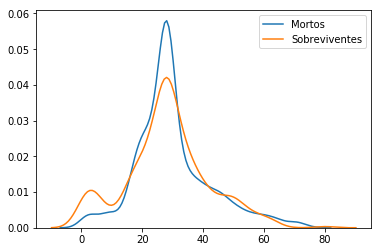

In [15]:
sns.kdeplot(mortos['Age'],label='Mortos')
sns.kdeplot(sobreviventes['Age'],label='Sobreviventes')

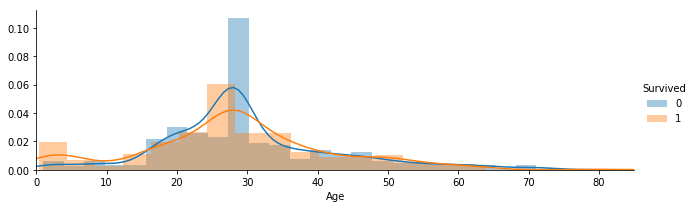

In [47]:
idade= sns.FacetGrid(titanic, hue="Survived", aspect=3);
idade.map(sns.distplot, "Age").add_legend();
idade.set(xlim=(0, 85));

**Tratando Embarked**

Em embarked temos apenas 3 valores diferentes, podemos colocar o dados que mais aparece nos valores nulos 

In [17]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

Verificando se Embarked tras informações uteis

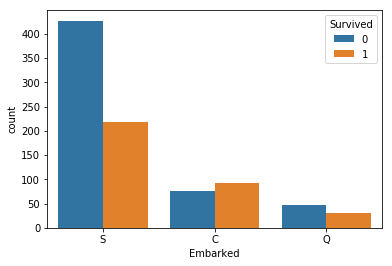

In [20]:
sns.countplot(data=titanic,x='Embarked',hue='Survived');

**Tratando Cabin**

Em cabin temos muito valores nulos, então primeiro temos que responder a pergunta, vale a pena usar este dado? e como podemos deixar esse dado mais informativo?
Para isto vamos tentar separa apenas a primera letra da cabine.

Vamos utilizar a o apply, que permite aplicar uma função em todos os valores de uma serie.

In [21]:
def tratCabin(valor):
    if type(valor) == str:
        return valor[0]
    else:
        return 'Ñ'
titanic['CabinTrat'] = titanic['Cabin'].apply(tratCabin)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinTrat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Ñ
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ñ
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Ñ


Vamos observar se cabin tem informações validas para saber se uma pessoa sobreviveu ou não.

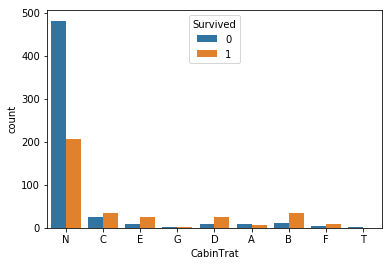

In [23]:
sns.countplot(data=titanic,x='CabinTrat',hue='Survived')

Observe que as pessoas que não temos valores da cabine (os dados nulos), tem chances muito maiores de terem morridos que as que temos o valor, ou seja esse dado é util para uma analise de sobrevivencia

**Trandandos dados pouco informativos**

Alguns dados mão tem nulos, mas do modo que estão não trazem muitas informações uteis, sendo nescessario trata-los, assim como foi nescessario em cabin. Este é o caso do Name, cada passageiro tem apenas um nome, assim não temos muita informação utel, porém o tratamento pode ser valido para uma analise.

In [24]:
def retirarTrat(nome):
    inicio = nome.find(',')
    fim = nome.find('.')
    return nome[inicio+2:fim]

titanic['trat'] = titanic['Name'].apply(retirarTrat)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinTrat,trat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Ñ,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ñ,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Ñ,Mr


Verificando se o tratamento é informativo

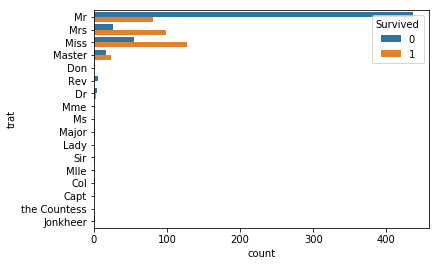

In [25]:
sns.countplot(data=titanic,y='trat',hue='Survived');

### Data wranling

Conseguimos tratar as colunas com dados nulos e pouco informativos, agora vamos tentar manipular tabela criando novas colunas com informações novas, ou ate reorganizando as informações


**Criando novos dados**

Podemos descobri se uma pessoal esta viajando sozinha, observando se ela esta com alguem da sua familia (Parch) ou companheiro e irmão(SibSp). 

In [26]:
titanic['sozinho'] = (titanic['Parch'] + titanic['SibSp']) < 1
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinTrat,trat,sozinho
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Ñ,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ñ,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Ñ,Mr,True


Comparando sozinho por sobreviventes

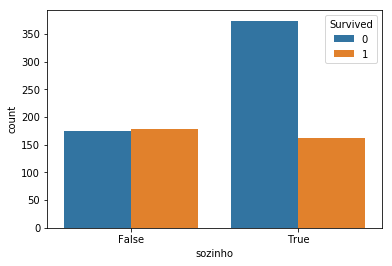

In [27]:
sns.countplot(data=titanic,x='sozinho',hue='Survived');

**Reorganizando as tabela**

**groupBy**

Podemos querer mostrar dados especificos separado por grupos de dados, como por exemplo podemos diferenciar dados especificos de sobreviventes e mortos, com sua media de idade ou passagem mais cara e mais barata paga por cada grupo. Para isto podemos usar o groupBy.

In [28]:
grupoSobreviventes = titanic.groupby('Survived')

In [29]:
## Media de idade
grupoSobreviventes['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

In [30]:
## Passagem mais cara
grupoSobreviventes['Fare'].max()

Survived
0    263.0000
1    512.3292
Name: Fare, dtype: float64

In [31]:
## Passagem mais barata
grupoSobreviventes['Fare'].min()

Survived
0    0.0
1    0.0
Name: Fare, dtype: float64

Também podemos querer organizar em varios niveis de grupo, como sobreviventes e sexo

In [32]:
grupoSobreviventes = titanic.groupby(['Sex','Survived'])

In [33]:
## Media de idade
grupoSobreviventes['Age'].mean()

Sex     Survived
female  0           25.666667
        1           28.716738
male    0           30.783120
        1           27.382294
Name: Age, dtype: float64

In [34]:
## Passagem mais cara
grupoSobreviventes['Fare'].max()

Sex     Survived
female  0           151.5500
        1           512.3292
male    0           263.0000
        1           512.3292
Name: Fare, dtype: float64

**Pivot table**

Outra maneira de reorganizar as tabelas é agrupar em duas variaveis em função de uma terceira, de maneiras que temos uma tabela. Esta função é semelhante a tabela dinamica do Excel

In [35]:
#media de valores da passagem, por classe e cabine 
pivotTable = titanic.pivot_table(index='Pclass',columns='CabinTrat',values='Fare',aggfunc=np.mean)
pivotTable

CabinTrat,A,B,C,D,E,F,G,T,Ñ
Pclass,,,,,,,,,
1,39.623887,113.505764,100.151341,63.324286,55.740168,NaN,NaN,35.5,76.848643
2,NaN,NaN,NaN,13.166675,11.587500,23.75000,NaN,NaN,20.909673
3,NaN,NaN,NaN,NaN,11.000000,10.61166,13.58125,NaN,13.725077


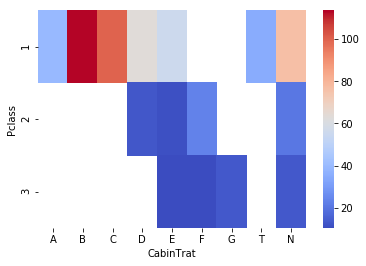

In [36]:
#Com esta função é util para fazer um grafico de calor
sns.heatmap(pivotTable,cmap='coolwarm')

### Concat e merge

As vezes também é necessario juntar duas tabelas separadas, para isto temos as funções concat e merge. Neste [link](https://pandas.pydata.org/pandas-docs/stable/merging.html) exite uma otima explicação sobre estas funcionalidades. 

Neste exemplo podemos querer juntar as tabelas de treino com as de teste, para uma analise mais acurada. vamos testar.

In [37]:
#Lendo tabela de test e treino separadas 
titanicTeste = pd.read_csv('test.csv')
#tamanho do teste
len(titanicTeste)

418

In [38]:
#Lendo tabela de teste 
titanicTreino = pd.read_csv('train.csv')
#tamanho do treino
len(titanicTreino)

891

**Concat**: Juntando dados de treino e teste

In [39]:
concat = pd.concat([titanicTeste,titanicTreino])

In [40]:
len(concat)

1309

In [41]:
concat.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298


**Merge:** O merge podemos juntar tabelas que tenmha o mesmo id, para isto vamos fazer duas tabelas agrupadas em Sex, e famos junta-las com o merge

In [42]:
grupo = concat.groupby('Sex')
media_idade = grupo['Age'].mean()
media_idade = pd.DataFrame(media_idade)
media_idade

,Age
Sex,
female,28.687088
male,30.585228


In [43]:
media_passagem = grupo['Fare'].mean()
media_passagem = pd.DataFrame(media_passagem)
media_passagem

,Fare
Sex,
female,46.198097
male,26.154601


In [44]:
merge = pd.merge(media_idade,media_passagem,on='Sex')
merge

,Age,Fare
Sex,,
female,28.687088,46.198097
male,30.585228,26.154601
